In [2]:
import plotly as py
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as  plt
import contextily as ctx
import geopandas as gpd
import plotly.graph_objects as go
from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
#imported directly from github to prevent any errors from cropping up
army_data = pd.read_csv("https://raw.githubusercontent.com/gbby/MBAI-Notebooks/main/data/minard-troops.csv")

city_data = pd.read_csv("https://raw.githubusercontent.com/gbby/MBAI-Notebooks/main/data/minard-cities.csv")

# Rough Draft
I wanted to outline my intentions with the data presented without actually going into depth with analysis at the time. It allowed me to have a bit of knowledge on what I can be looking for and what I could potentially do.

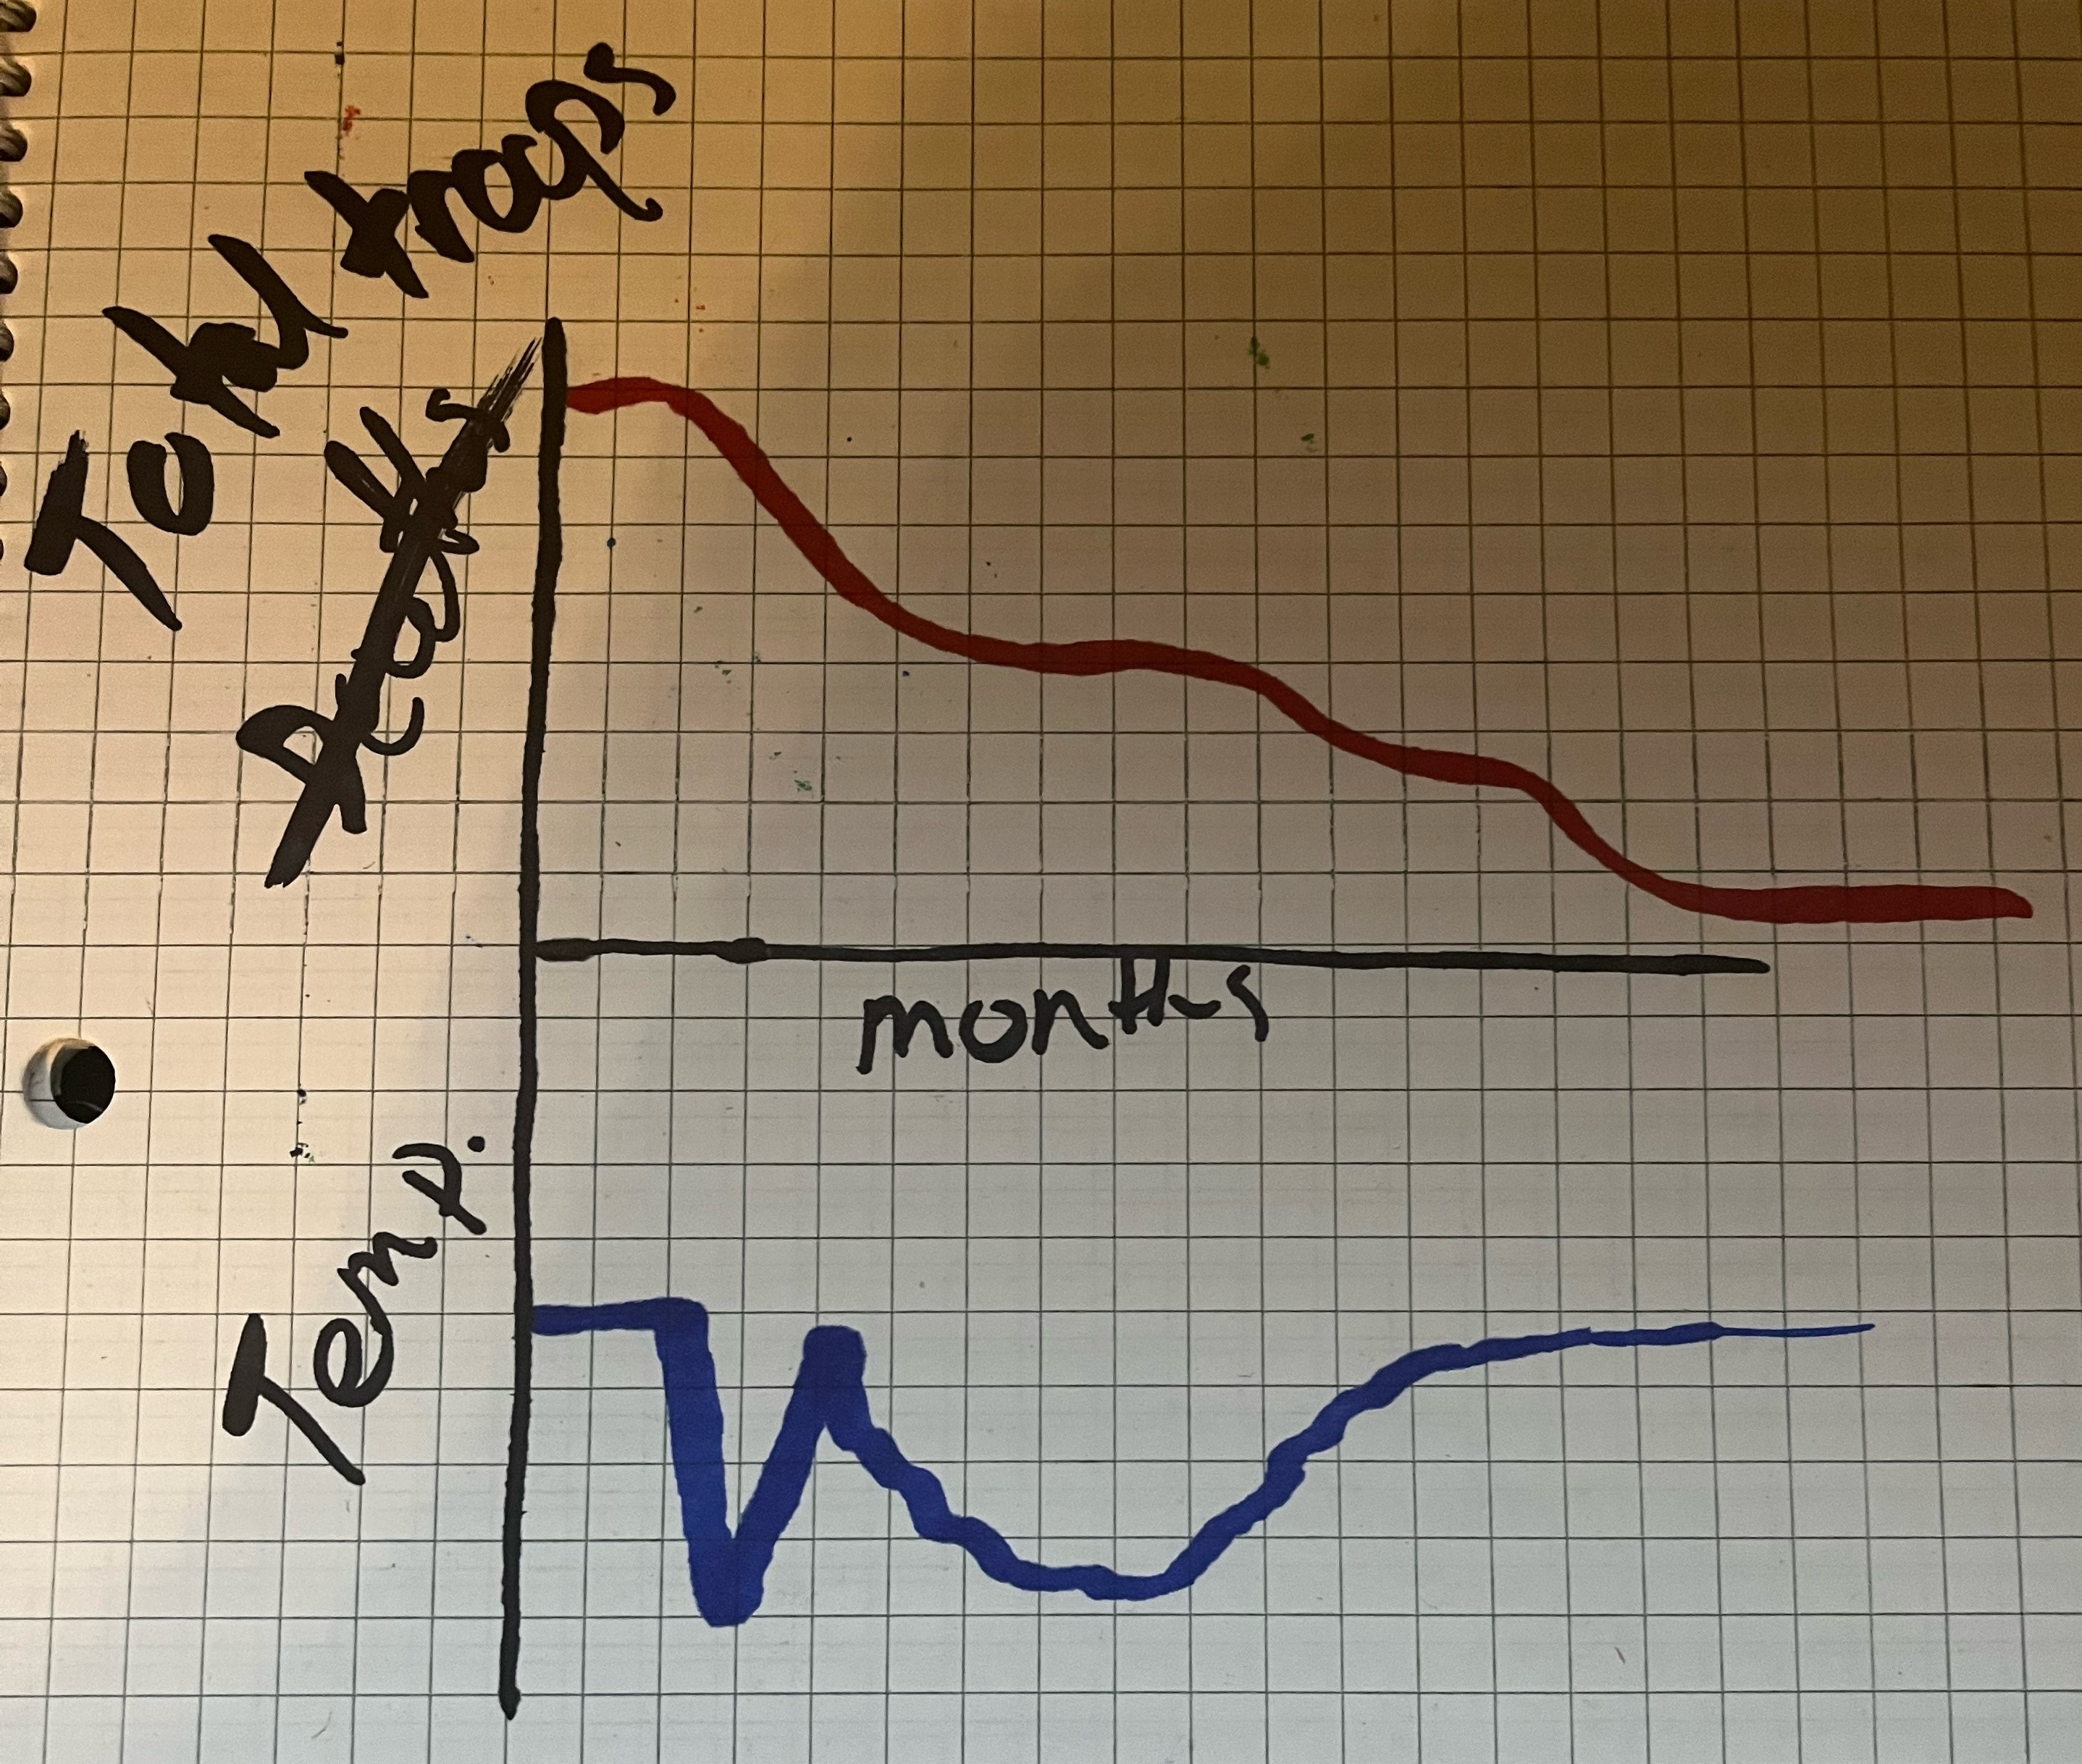

# python attempt 1
Using plotly I created a 'heatmap' of the survivor numbers to get a basic understanding of of it would look

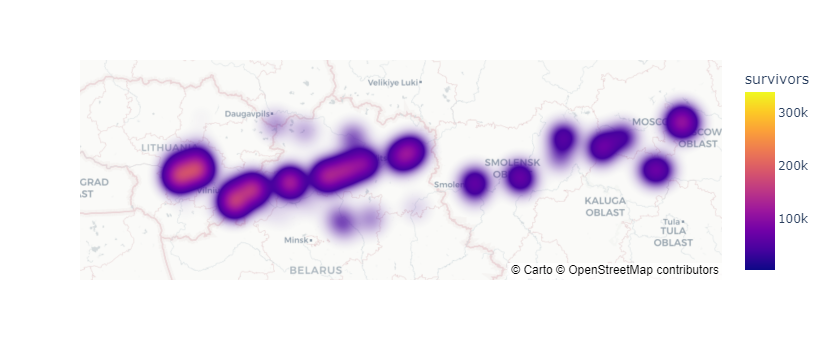

In [12]:

army = px.density_mapbox(army_data, lat = 'lat', lon = 'long',
                         z = 'survivors',
                         center = dict(lat = 55, lon = 30),
                         zoom = 4.7, #experimented with different zoom lengths since the default was too far.
                         hover_name = 'direction',
                         mapbox_style = 'carto-positron'
                         )
army.show()

# python attempt 2
Adjusted the colours and used animation_frame to signify the advance and retreat seperately to show their losses when travelling both ways.

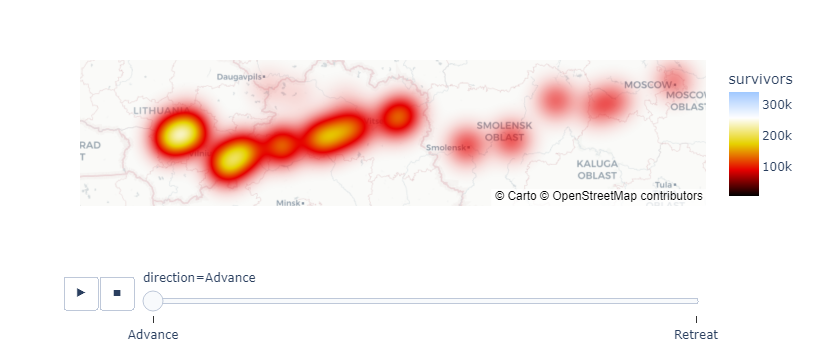

In [11]:

army = px.density_mapbox(army_data, lat = 'lat', lon = 'long',
                         z = 'survivors',
                         center = dict(lat = 55, lon = 30),
                         zoom = 4.7, 
                         hover_name = 'direction',
                         mapbox_style = 'carto-positron',
                         animation_frame = 'direction',
                         radius = 40,
                         color_continuous_scale = "blackbody"
              
                         
)
army.show()

# Attempt 2.5
I wanted to incorporate the cities markers since some of the largest losses occured in major cities, hovering over the dots allows you to see the city name

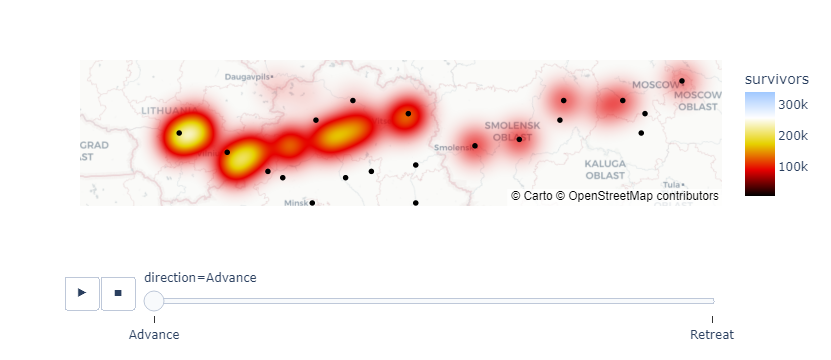

In [6]:

army = px.density_mapbox(army_data, lat = 'lat', lon = 'long',
                         z = 'survivors',
                         center = dict(lat = 55, lon = 30),
                         zoom = 4.7, 
                         hover_name = 'direction',
                         mapbox_style = 'carto-positron',
                         animation_frame = 'direction',
                         radius = 40,
                         color_continuous_scale = "blackbody"
              
                         
                         )

army.add_scattermapbox(lat = city_data['lat'], lon = city_data['long'],     #adding the cities
                       hovertext = city_data['city'], 
                       marker_size = 6, marker_color = "rgb(0,0,0)")
army.show()

# ***Attempt 3***
I wasn't happy with attempt 2.5 because the 'survival' bar resets between the advance and retreat from 300K to 100k. I resolved this by specifying the range so it remains constant. This allows us to see the total loss throughout the journey

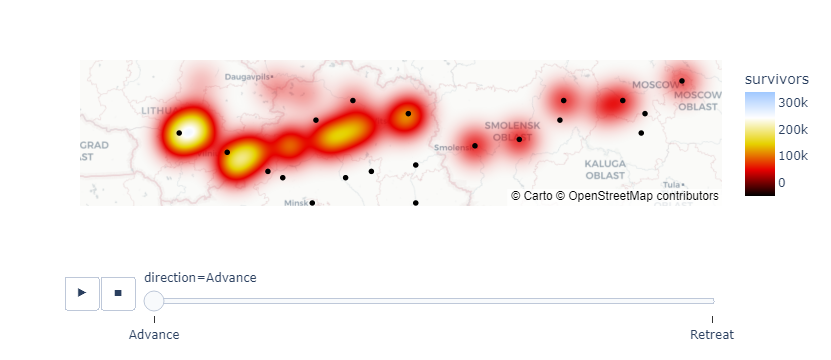

In [9]:
army = px.density_mapbox(army_data, lat = 'lat', lon = 'long',
                         z = 'survivors',
                         center = dict(lat = 55, lon = 30),
                         zoom = 4.7, 
                         hover_name = 'direction',
                         mapbox_style = 'carto-positron',
                         animation_frame = 'direction',
                         radius = 40,
                         color_continuous_scale = "blackbody",
                         range_color=(-50000,340000) #specifying the range
                         
                         )
army.add_scattermapbox(lat = city_data['lat'], lon = city_data['long'], 
                       hovertext = city_data['city'], 
                       marker_size = 6, marker_color = "rgb(0,0,0)")

army.show()

# Final Attempt
First, I would like to acknowledge that this is far from being great. This is my first project in python visualization and it definietly shows. 

With this figure I wanted to tell a story showing the journey of the army but without dates accompanying the army totals I resorted to using latitude. The losses are reflected with the fading of the circle. I wanted to also incude the weather data in the animation but found it difficult without the 

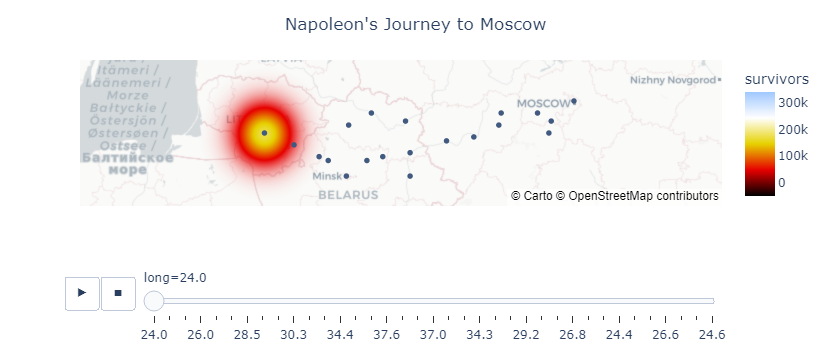

In [32]:
army = px.density_mapbox(army_data, lat = 'lat', lon = 'long',
                         z = 'survivors',
                         center = dict(lat = 55, lon = 30),
                         zoom = 4, 
                         hover_name = 'group',
                         mapbox_style = 'carto-positron',
                         animation_frame = 'long', #Instead of using direction, changed animation to longitude
                         animation_group =  'direction',
                         radius = 60, 
                         color_continuous_scale = "blackbody",
                         range_color=(-50000,340000),
                         
                    
                         )
army.add_scattermapbox(lat = city_data['lat'], lon = city_data['long'], 
                       hovertext = city_data['city'], 
                       marker_size = 6, marker_color = "rgb(66,89,128)") #adjusting the colour of the markers
army.update_layout(title_text="Napoleon's Journey to Moscow", title_x=0.5) #Adding the title and centering

army.show()

# Conclusion
At first I  just wanted to recreate Minard's visual since I had no prior experience in creating visuals in python. Once I became more confident in my skills I tried to tell a story displaying the sheer amount of losses the army recieved, I believe that my visual excels in showing the order of magnitude loss in soldiers with how faded the circle becomes. It also shows the audience the large amount of losses faced on their way to Moscow which illustrates their unpreparedness.

I have also included my entire .ipny files for each attempt in my github repository, in said repository I have generated 3 .html files which allow you to see the visuals in a webpage context instead of on Jupyter notebook. The repository link is: https://github.com/EyeAyee/Visualization-Data/tree/main/Visualizing%20Napoleon's%20troops